<a href="https://colab.research.google.com/github/Julia-Vanyarina/6_1/blob/main/6_1ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
from google.colab import files
uploaded = files.upload()

Saving pageview_counts_202504061121.csv to pageview_counts_202504061121 (3).csv


In [41]:
import pandas as pd
df = pd.read_csv('pageview_counts_202504061121.csv')
df['datetime'] = pd.to_datetime(df['datetime'])

In [42]:
df.head()

,pagename,pageviewcount,datetime
0,Apple,71,2025-02-04 00:00:00
1,Apple,48,2025-02-04 01:00:00
2,Apple,39,2025-02-04 02:00:00
3,Apple,39,2025-02-04 03:00:00
4,Apple,42,2025-02-04 04:00:00


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1440 entries, 0 to 1439
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   pagename       1440 non-null   object        
 1   pageviewcount  1440 non-null   int64         
 2   datetime       1440 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 33.9+ KB


In [44]:
df.describe()

,pageviewcount,datetime
count,1440.00000,1440
mean,53.98125,2025-03-05 23:30:00
min,17.00000,2025-02-04 00:00:00
25%,38.00000,2025-02-18 23:45:00
50%,48.00000,2025-03-05 23:30:00
75%,68.00000,2025-03-20 23:15:00
max,196.00000,2025-04-04 23:00:00
std,23.49173,NaN


Предобработка данных:
Всего строк: 1440
Период данных: с 2025-02-04 00:00:00 по 2025-04-04 23:00:00
Пропуски:
pagename         0
pageviewcount    0
datetime         0
dtype: int64

Анализ данных за последний месяц:
Среднее число просмотров в день: 1293.5
Максимальное число просмотров за день: 1757
Минимальное число просмотров за день: 788
Самый популярный час: 21:00 - 70.9 просмотров


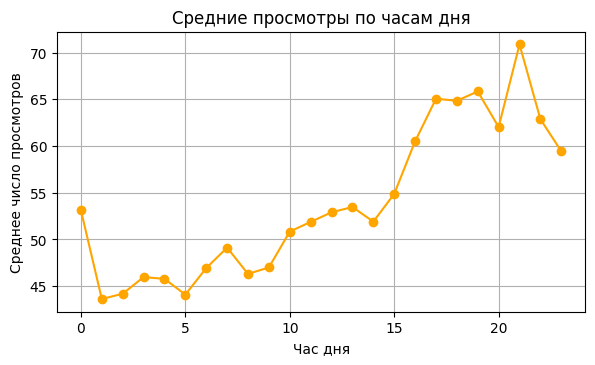

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime


print("Предобработка данных:")
print(f"Всего строк: {len(df)}")
print(f"Период данных: с {df['datetime'].min()} по {df['datetime'].max()}")
print(f"Пропуски:\n{df.isnull().sum()}")


last_month = df[df['datetime'] >= datetime(2025, 3, 4)]

# Группировка по дням для анализа
daily_views = last_month.groupby(last_month['datetime'].dt.date)['pageviewcount'].sum().reset_index()
daily_views.columns = ['date', 'total_views']


plt.figure(figsize=(15, 8))


#Распределение просмотров по часам
plt.subplot(2, 2, 2)
hourly_pattern = last_month.groupby(last_month['datetime'].dt.hour)['pageviewcount'].mean()
hourly_pattern.plot(kind='line', marker='o', color='orange')
plt.title('Средние просмотры по часам дня')
plt.xlabel('Час дня')
plt.ylabel('Среднее число просмотров')
plt.grid()


# Результаты
print("\nАнализ данных за последний месяц:")
print(f"Среднее число просмотров в день: {daily_views['total_views'].mean():.1f}")
print(f"Максимальное число просмотров за день: {daily_views['total_views'].max()}")
print(f"Минимальное число просмотров за день: {daily_views['total_views'].min()}")
print(f"Самый популярный час: {hourly_pattern.idxmax()}:00 - {hourly_pattern.max():.1f} просмотров")

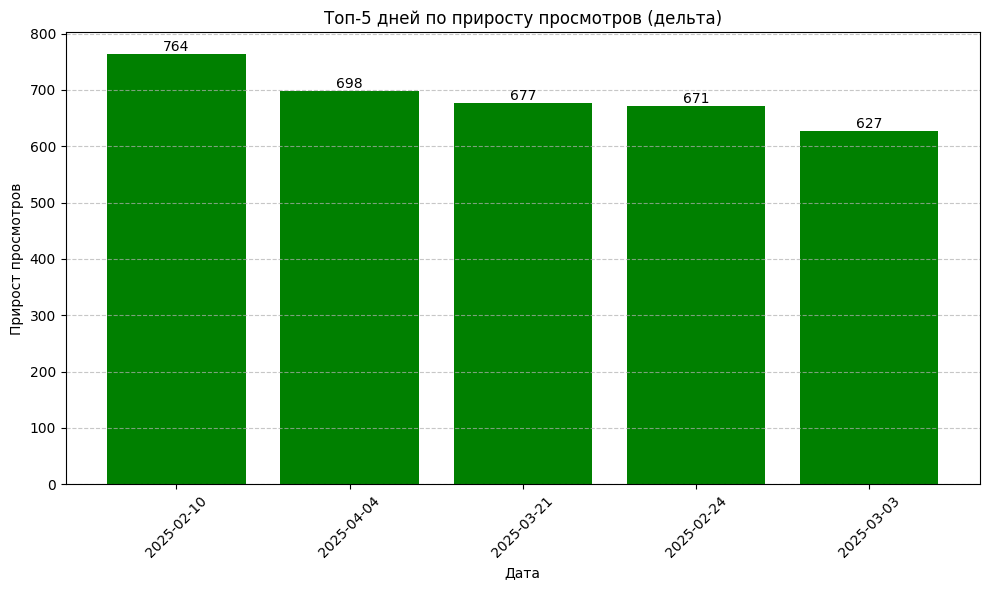

In [60]:
import pandas as pd
import matplotlib.pyplot as plt


# Группировка по дате с подсчетом суммы просмотров
daily_views = df.groupby('date')['pageviewcount'].sum()

daily_delta = daily_views.diff()

# Отбор топ-5 дней по положительной дельте
top_5_delta_days = daily_delta.sort_values(ascending=False).head(5)

plt.figure(figsize=(10, 6))
bars = plt.bar(top_5_delta_days.index.astype(str), top_5_delta_days.values, color='green')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{int(yval)}', ha='center', va='bottom')

plt.title('Топ-5 дней по приросту просмотров (дельта)')
plt.xlabel('Дата')
plt.ylabel('Прирост просмотров')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


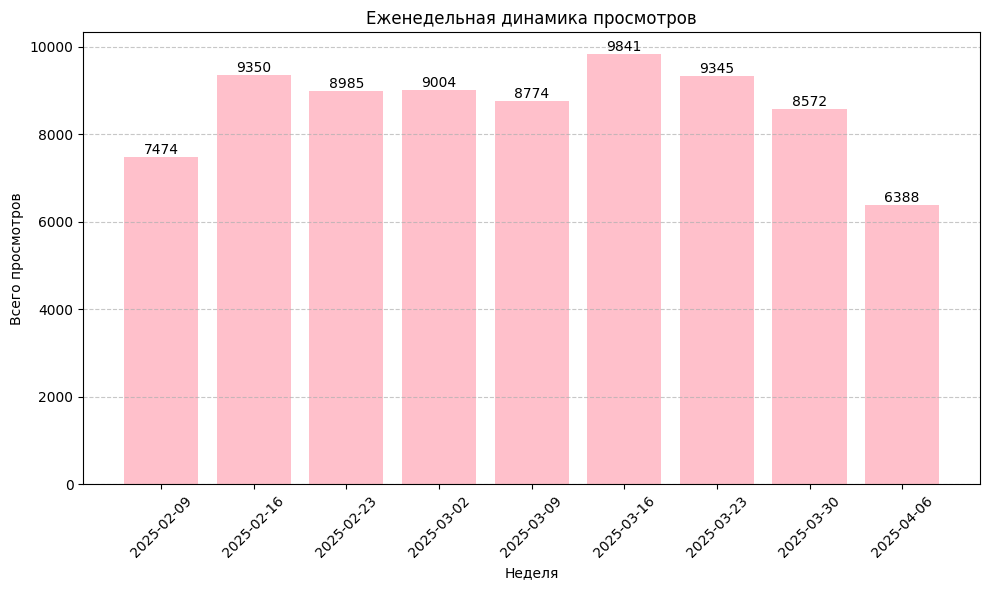

In [59]:
import pandas as pd
import matplotlib.pyplot as plt

# Группировка по неделям и суммирование просмотров
weekly_views = df.resample('W', on='datetime')['pageviewcount'].sum()

plt.figure(figsize=(10, 6))
bars = plt.bar(weekly_views.index.strftime('%Y-%m-%d'), weekly_views.values, color='pink')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{int(yval)}', ha='center', va='bottom')

plt.title('Еженедельная динамика просмотров')
plt.xlabel('Неделя')
plt.ylabel('Всего просмотров')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


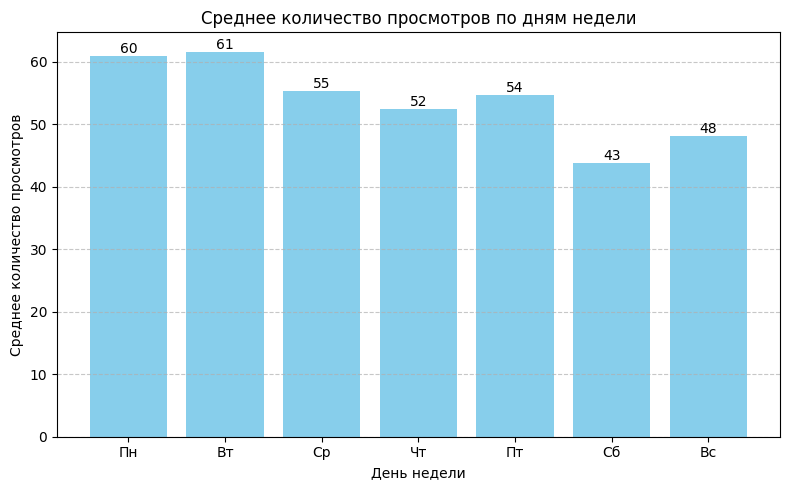

In [58]:
df['weekday'] = df['datetime'].dt.weekday

weekday_names = ['Пн', 'Вт', 'Ср', 'Чт', 'Пт', 'Сб', 'Вс']
df['weekday_name'] = df['weekday'].apply(lambda x: weekday_names[x])

# Группировка и расчёт среднего количества просмотров
weekday_avg = df.groupby('weekday_name')['pageviewcount'].mean().reindex(weekday_names)

plt.figure(figsize=(8, 5))
bars = plt.bar(weekday_avg.index, weekday_avg.values, color='skyblue')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{int(yval)}', ha='center', va='bottom')

plt.title('Среднее количество просмотров по дням недели')
plt.xlabel('День недели')
plt.ylabel('Среднее количество просмотров')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


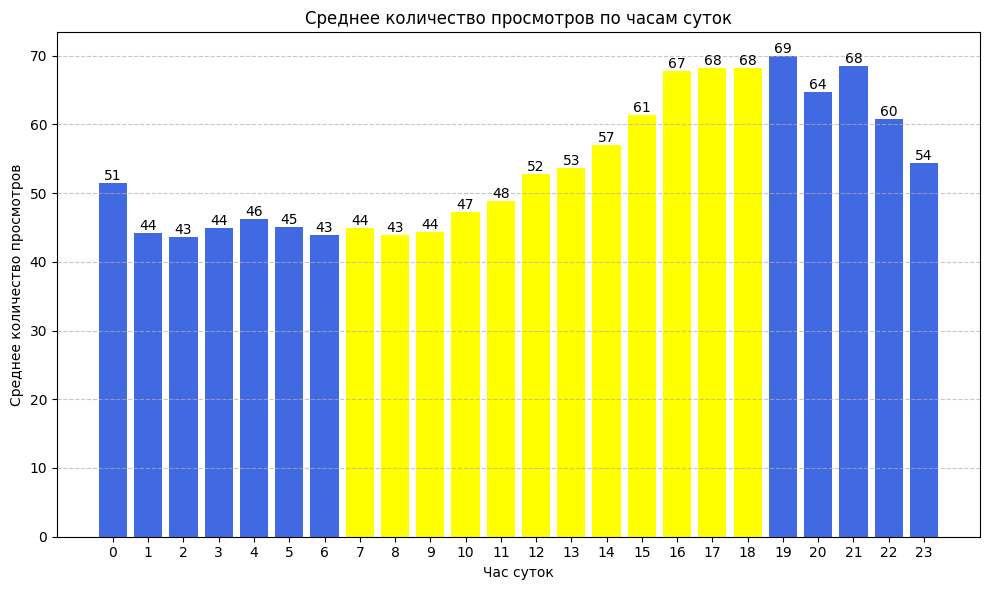

In [57]:
# Извлекаем час
df['hour'] = df['datetime'].dt.hour

# Считаем среднее количество просмотров по часам суток
hourly_avg = df.groupby('hour')['pageviewcount'].mean()

colors = ['yellow' if 7 <= hour <= 18 else 'royalblue' for hour in hourly_avg.index]

plt.figure(figsize=(10, 6))
bars = plt.bar(hourly_avg.index, hourly_avg.values, color=colors)


for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{int(yval)}', ha='center', va='bottom')

plt.title('Среднее количество просмотров по часам суток')
plt.xlabel('Час суток')
plt.ylabel('Среднее количество просмотров')
plt.xticks(range(0, 24))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


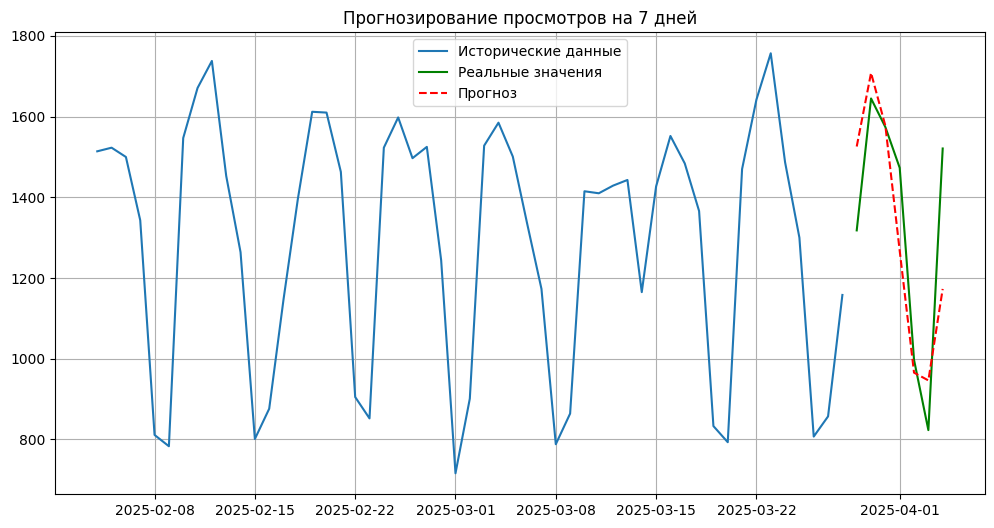

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
import numpy as np

daily_data = df.resample('D', on='datetime')['pageviewcount'].sum()

train_data = daily_data[:-7].values.astype(float)
test_data = daily_data[-7:].values.astype(float)

try:
    model = ARIMA(train_data, order=(7, 0, 1))
    model_fit = model.fit()

    # Прогнозирование
    forecast = model_fit.forecast(steps=7)

    # Визуализация
    plt.figure(figsize=(12, 6))
    plt.plot(daily_data.index[:-7], train_data, label='Исторические данные')
    plt.plot(daily_data.index[-7:], test_data, label='Реальные значения', color='green')
    plt.plot(daily_data.index[-7:], forecast, label='Прогноз', linestyle='--', color='red')
    plt.title('Прогнозирование просмотров на 7 дней')
    plt.legend()
    plt.grid()
    plt.show()

except Exception as e:
    print(f"Ошибка при построении модели ARIMA: {e}")
    print("Рекомендации:")
    print("1. Убедитесь, что данные не содержат пропусков")
    print("2. Попробуйте другие параметры order (например, (1,0,0))")
    print("3. Проверьте стационарность ряда (можно через ADF тест)")